### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlean as sqlite3
from sklearn.feature_extraction.text import TfidfVectorizer

### Import Data

In [2]:
DATABASE_PATH = 'C:/University/6G7V0007_MSC_Project/Project/Data/joblistings_transformed.db'
con = sqlite3.connect(DATABASE_PATH)

In [3]:
job = pd.read_sql('SELECT * FROM job', con)
company = pd.read_sql('SELECT * FROM company', con)
website = pd.read_sql('SELECT * FROM website', con)

C:\Users\walte\AppData\Local\Temp\ipykernel_4328\1361633401.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  job = pd.read_sql('SELECT * FROM job', con)
C:\Users\walte\AppData\Local\Temp\ipykernel_4328\1361633401.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  company = pd.read_sql('SELECT * FROM company', con)
C:\Users\walte\AppData\Local\Temp\ipykernel_4328\1361633401.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  website = pd.read_sql('SELECT * FROM website', con)


In [4]:
job.set_index('id', inplace=True)
company.set_index('id', inplace=True)
website.set_index('id', inplace=True)

In [5]:
test = job.merge(company, left_on='company_id', right_index=True)

In [6]:
test.rename(columns={'name':'company_name'}, inplace=True)

In [7]:
test.head()

,website_id,company_id,title,location,pay,description,timestamp,company_name
id,,,,,,,,
1,1,1,Graduate Electronics/Computer Science Software...,Cirencester (Gloucestershire),"£30,000",About the role A unique opportunity to join a ...,2024-06-28,AccuLink Technology
145,1,1,Project Engineer,Cirencester (Gloucestershire),Competitive,AccuLink Technology specialises in the design ...,2024-06-28,AccuLink Technology
2,1,2,Graduate Software Development Engineer,London,Competitive,nFocus Graduate Academy Accelerate your career...,2024-06-28,nfocus
3,1,3,Graduate Technology Consultant,Manchester (Hybrid),Competitive,About Arlanis Reply: Arlanis Reply is the Repl...,2024-06-28,Reply
20,1,3,Graduate Software Developer,London and Manchester (Hybrid),Competitive,About Arlanis Reply: Arlanis Reply is the Repl...,2024-06-28,Reply


### TF-IDF with Sci-kit Learn

In [36]:
tfidf = TfidfVectorizer(max_df=0.65, stop_words='english')

X = tfidf.fit_transform(test['description'])

In [37]:
X.shape

(1200, 15566)

In [38]:
X = X.toarray()

In [39]:
df = pd.DataFrame(X, columns= tfidf.get_feature_names_out())

In [40]:
df.head()

,00,000,000p,000pa,000usd,001,00227646,00227647,009,0096,...,équipe,équité,été,éventail,évoluer,être,œuvre,ﬁeld,ﬂexibility,ﬂow
0,0.0,0.035123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df.iloc[0]

00            0.000000
000           0.035123
000p          0.000000
000pa         0.000000
000usd        0.000000
                ...   
être          0.000000
œuvre         0.000000
ﬁeld          0.000000
ﬂexibility    0.000000
ﬂow           0.000000
Name: 0, Length: 15566, dtype: float64

In [42]:
entry = df.iloc[0].gt(0)

In [43]:
listing1 = df.iloc[0].loc[entry]

In [44]:
listing1

000        0.035123
25         0.047242
30         0.046767
5g         0.095004
ability    0.026078
             ...   
web        0.051911
willing    0.060569
windows    0.064415
world      0.028697
written    0.083547
Name: 0, Length: 189, dtype: float64

In [45]:
listing1.sort_values(ascending=False).head(10)

gui           0.233670
expected      0.170563
scrum         0.161197
cd            0.139289
software      0.139029
ci            0.134927
code          0.134746
nodered       0.128914
deriving      0.121848
estimating    0.121848
Name: 0, dtype: float64

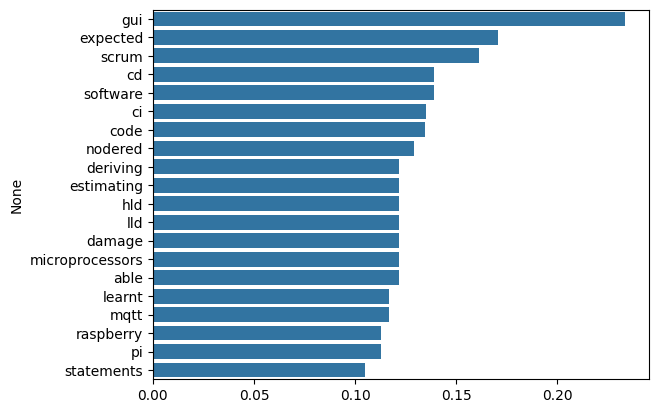

In [46]:
fig, ax = plt.subplots()
ax = sns.barplot(x=listing1.sort_values(ascending=False).head(20).values, y=listing1.sort_values(ascending=False).head(20).index)